In [1]:
import os
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls ../output

100610_ap.nii          100610_qmap_unfold.png   105923_pd.nii
100610_ap.png          100610_thick_unfold.png  105923_pd_viridis.gif
100610_ap_viridis.gif  100610_unfold_data.pkl   105923_qmap_unfold.png
100610_boxplot.png     100610_unfolded.npz      105923_thick_unfold.png
100610_GI_unfold.png   105923_ap.nii            105923_unfold_data.pkl
100610_io.nii          105923_ap_viridis.gif    105923_unfolded.npz
100610_io_viridis.gif  105923_GI_unfold.png     unfold_data.pkl
100610_pd.nii          105923_io.nii
100610_pd_viridis.gif  105923_io_viridis.gif


In [2]:
test = pd.read_pickle('../output/unfold_data.pkl')


In [6]:
x = np.load('../output/100610_unfolded.npz')

In [13]:
np.shape(x[x.files[0]]) == (128, 256)

True

In [43]:
test = x[x.files[3]]

In [44]:
test_mean, test_std = np.mean(test), np.std(test)
upper_bound, lower_bound = test_mean+test_std, test_mean-test_std

In [48]:
#np.fromiter((np.nan for x in test if np.logical_or(x>upper_bound,x<lower_bound)),dtype=test.dtype)

test[np.logical_or(test>upper_bound,test<lower_bound)] = np.nan

In [49]:
test

array([[-0.00638822,         nan,  0.92108668, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.52876367,  0.73229596,  0.58855499, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79173892,  0.93406876,  0.33105864, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [        nan,         nan,         nan, ...,         nan,
         2.91787081,         nan],
       [-0.02861425, -0.02861425, -0.02847725, ...,  1.63707185,
                nan,         nan],
       [ 0.        ,  0.        ,  0.        , ...,         nan,
                nan, -0.19578015]])

In [10]:
data = pd.DataFrame(unfold)

In [21]:
np_test = {'adfd':234231431,'kuhlreh':342143}
np_test2 = {'435245':42314,'adfdsf':525452}

In [22]:
np_test.update(np_test2)

In [25]:
np_test

{'adfd': 234231431, 'kuhlreh': 342143, '435245': 42314, 'adfdsf': 525452}

In [29]:
test.files

['arr_0']

In [27]:
x = pd.read_pickle('../output/unfold_data.pkl')


,subject,labels,x_label,streamlengths,GI,qMap
0,100610,1,0,1.32,-0.006388,339.278985
1,100610,1,0,1.32,1.528764,339.278985
2,100610,1,0,1.32,0.791739,339.278985
3,100610,1,0,1.32,0.312757,339.278985
4,100610,1,0,1.32,5.310064,339.278985
...,...,...,...,...,...,...
32763,105923,5,255,NaN,1.368044,454.190306
32764,105923,5,255,NaN,3.854680,454.190306
32765,105923,5,255,1.35,132.698424,414.548573
32766,105923,5,255,1.35,-0.760230,414.548573


In [34]:
mean,std = np.mean(x.GI),np.std(x.GI)
mean+3*std

6.688870928615531

In [22]:
x[x['labels'] ==1]
data = x

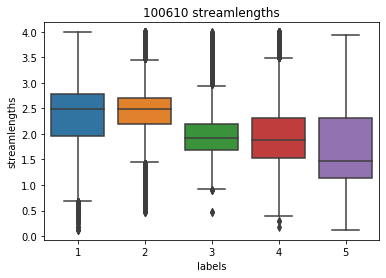

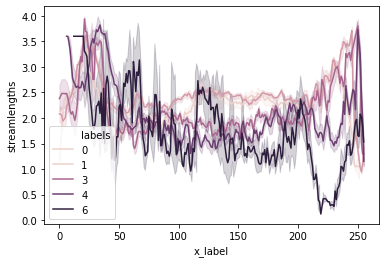

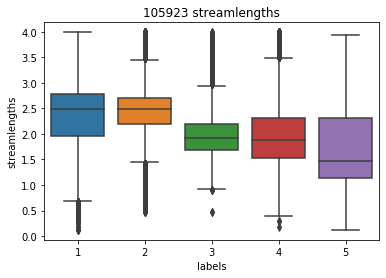

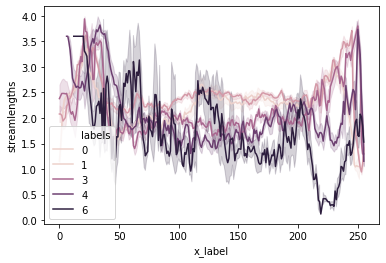

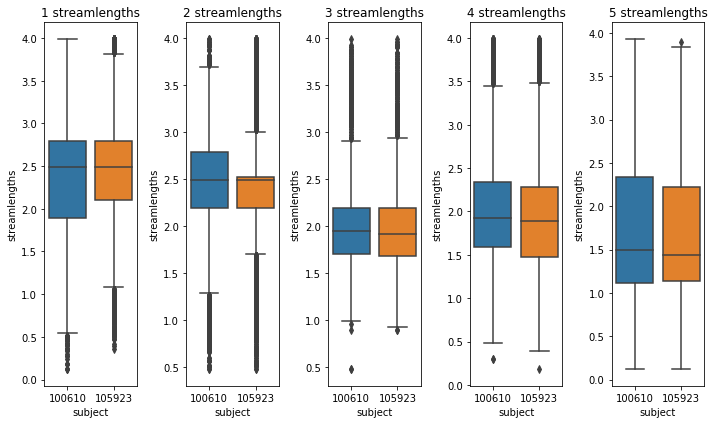

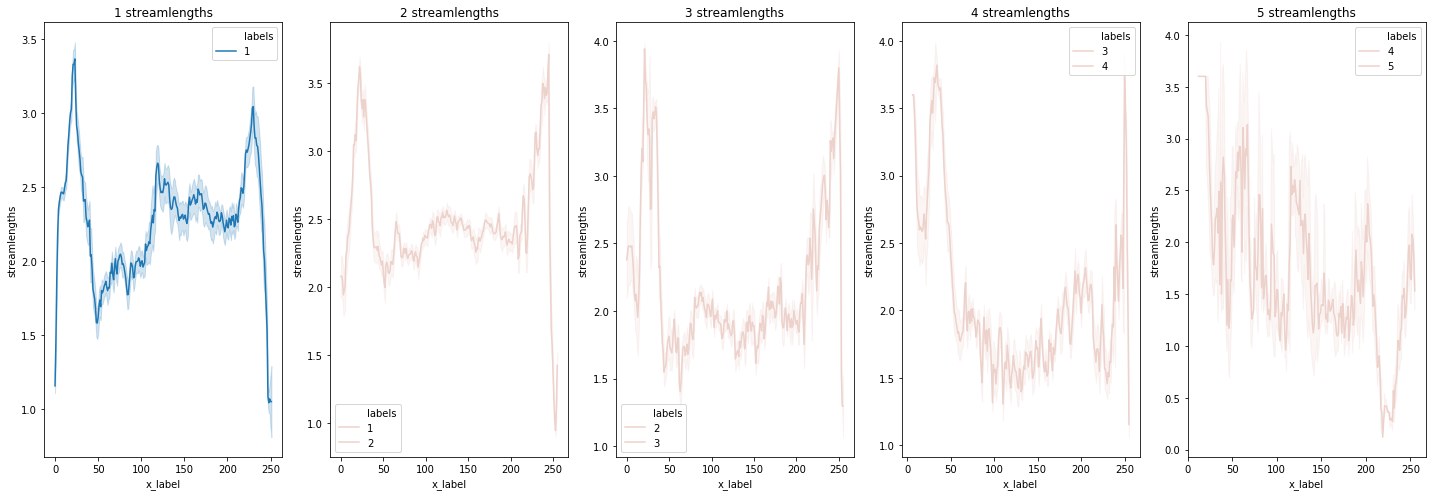

In [48]:
y_fields = [key for key in data.keys() if key not in ['subject','labels','x_label']]

def boxplot_subfields(data, feature, subject):
    plt.figure()
    sns.boxplot(x='labels',y=feature, data =data)
    plt.title(' '.join([subject,feature]))
#     plt.savefig('_'.join([subject,feature,'boxplot.png']),dpi=600)
    
def boxplot_group_subfields(data,feature):
    plt.figure(figsize=(10,6))
    for k in range(1,6):
        plt.subplot(1,5,k)
        sns.boxplot(x='subject',y=feature,data=data[data['labels'] == k])
        plt.title(' '.join([str(k),feature]))
    plt.tight_layout()
    #plt.savefig('_'.join([feature,'group.png']),dpi=600)
        
def lineplot_AP(data, feature, subject):
    plt.figure()
    sns.lineplot(x='x_label',y=feature,hue='labels',data=data)
    #plt.savefig('_'.join([subject,feature,'lineplot.png']),dpi=600)
    
def lineplot_group_AP(data,feature):
    subjects = np.unique(data.subject)
    plt.figure(figsize=(20,7))
    for k in range(1,6):
        plt.subplot(1,5,k)
        sns.lineplot(x='x_label',y=feature,hue='labels',data=data[data['labels'] == k])
        plt.title(' '.join([str(k),feature]))
    plt.tight_layout()
#     plt.savefig('_'.join([feature,'group.png']),dpi=600)
    
    
# for feature in y_fields:
feature = 'streamlengths'
for sub in np.unique(x.subject):
    boxplot_subfields(x,feature,sub)
    lineplot_AP(data,feature,sub)

boxplot_group_subfields(x,feature)
lineplot_group_AP(x,feature)

In [11]:
[key for key in ['subject','labels','x_label','streamlengths','GI','qMap'] if key not in ['subject','labels','x_label']]

['streamlengths', 'GI', 'qMap']